---
---
# Logistic regression for multi-class classification

### * A basic implementation, on MNIST digits dataset, that includes a single linear layer (from 28x28 greyscale image to a length-10 activation vector), followed by a soft-max operation, minimizing the standard cross-entropy loss.

### * Training is done under 4 (2x2) different settings of the hyper-parameters.

### * There are missing pieces of code that you should fill in (notice the  - <font color='red'>EDIT CODE</font> messages).

### * You are required to submit this ipynb file, <font color='blue'>including the executed output blocks</font>.
---
---

## 1] import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## 2] load data

In [2]:
import os
import urllib.request

filename_data = './data/assignment_05_data.npz'

if os.path.exists(filename_data):
    print('data already exists')
else:
    print('downloading data...')
    os.makedirs('./data', exist_ok=True)
    url = 'https://www.cs.haifa.ac.il/~skorman/assignment_05_data.npz'
    urllib.request.urlretrieve(url, filename_data)
    print('data downloaded successfully')


data already exists


In [3]:
directory_data  = './data/'
filename_data   = 'assignment_05_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training images :', x_train.shape[0])
print('height of training images :', x_train.shape[1])
print('width of training images :', x_train.shape[2])
print('*************************************************')
print('number of testing images :', x_test.shape[0])
print('height of testing images :', x_test.shape[1])
print('width of testing images :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
number of training images : 20000
height of training images : 28
width of training images : 28
*************************************************
number of testing images : 8000
height of testing images : 28
width of testing images : 28
*************************************************


## 3] number of classes

In [4]:
nClass = y_train.shape[1]

print('*************************************************')
print('number of classes :', nClass)
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## 4] vectorize image data

In [5]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('*************************************************')
print('dimension of the training data :', vector_x_train.shape)
print('dimension of the testing data :', vector_x_test.shape)
print('*************************************************')
print('dimension of the training label :', y_train.shape)
print('dimension of the testing label :', y_test.shape)
print('*************************************************')

*************************************************
dimension of the training data : (20000, 784)
dimension of the testing data : (8000, 784)
*************************************************
dimension of the training label : (20000, 10)
dimension of the testing label : (8000, 10)
*************************************************


## 5] index for each class

In [6]:
index_train = {}
index_test  = {}

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

print('*************************************************')

for i in range(nClass):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

    print('number of the training data for class %2d : %5d' % (i, number_index_train[i]))
    print('number of the testing data for class %2d : %5d' % (i, number_index_test[i]))

print('*************************************************')

*************************************************
number of the training data for class  0 :  2000
number of the testing data for class  0 :   800
number of the training data for class  1 :  2000
number of the testing data for class  1 :   800
number of the training data for class  2 :  2000
number of the testing data for class  2 :   800
number of the training data for class  3 :  2000
number of the testing data for class  3 :   800
number of the training data for class  4 :  2000
number of the testing data for class  4 :   800
number of the training data for class  5 :  2000
number of the testing data for class  5 :   800
number of the training data for class  6 :  2000
number of the testing data for class  6 :   800
number of the training data for class  7 :  2000
number of the testing data for class  7 :   800
number of the training data for class  8 :  2000
number of the testing data for class  8 :   800
number of the training data for class  9 :  2000
number of the testing data f

## 6] plot data

In [7]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 1, nRow * 1))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [8]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

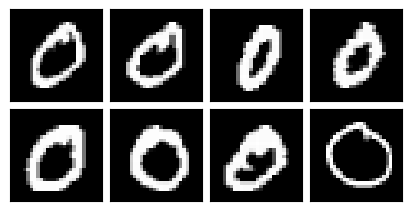

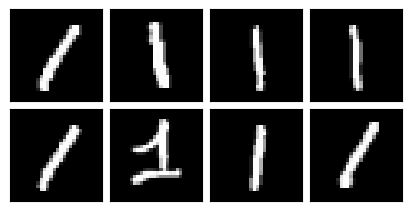

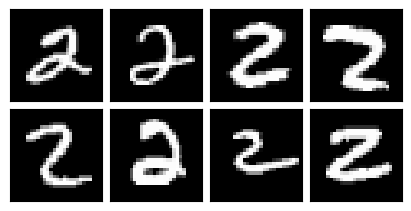

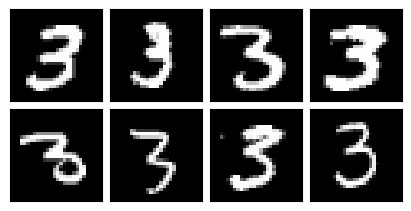

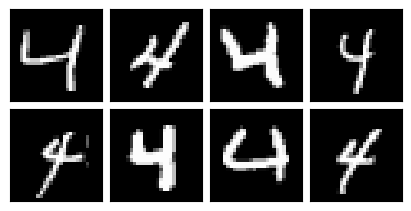

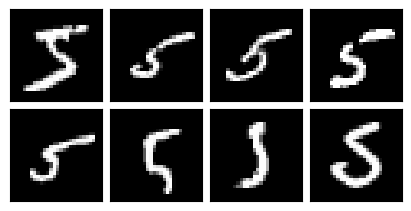

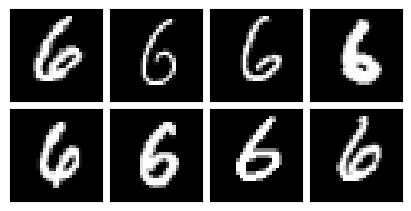

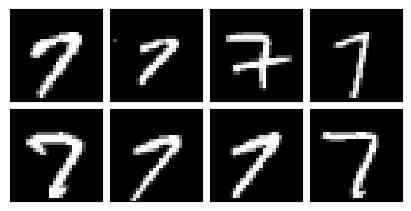

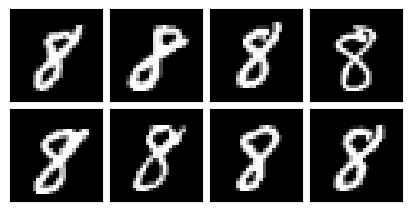

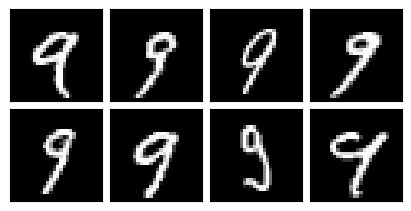

In [9]:
for i in range(nClass):
    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## 7] linear layer

In [10]:
def layer_linear(input, weight):

    output = np.matmul(input, np.transpose(weight))

    return output

## 8] softmax function - <font color='red'>EDIT CODE</font>


In [11]:
def activation_softmax(input):

    output = np.exp(input) / np.sum(np.exp(input), axis=1, keepdims=True)

    return output

## 9] compute prediction by the forward propagation of the neural network - <font color='red'>EDIT CODE</font>

In [12]:
def compute_prediction(input, weight):
    input_with_bias = np.concatenate((input, np.ones((input.shape[0], 1))), axis=1)  # Add bias term
    prediction = np.matmul(input_with_bias, weight)
    return prediction


## 10] compute cross-entropy loss - <font color='red'>EDIT CODE</font>

In [13]:
def compute_loss_cross_entropy(prediction, label):

    loss = -np.sum(label * np.log(prediction + 1e-10)) / prediction.shape[0]

    return loss

## 11] compute weight decay regularization term of loss - <font color='red'>EDIT CODE</font>

In [14]:
def compute_loss_regularization(weight):

    loss = np.sum(np.square(weight))

    return loss

## 12] compute final loss function - <font color='red'>EDIT CODE</font>
### - using the hyper-parameter lmbda to balance the cross-entropy and weight-decay (L=CE+lmbda*WD)

In [15]:
def compute_loss(prediction, label, lmbda, weight):
    epsilon = 1e-10
    num_samples = prediction.shape[0]
    
    prediction = np.clip(prediction, epsilon, 1 - epsilon)  # Clip prediction values to avoid zeros or ones
    label = np.clip(label, epsilon, 1 - epsilon)  # Clip label values to avoid zeros or ones
    
    cross_entropy_loss = -np.sum(label * np.log(prediction)) / num_samples
    regularization_loss = lmbda * np.sum(np.square(weight))
    
    loss = cross_entropy_loss + regularization_loss

    return loss


## 13] compute gradient for the cross-entropy term  - <font color='red'>EDIT CODE</font>
(follow, for example, https://jmlb.github.io/ml/2017/12/26/Calculate_Gradient_Softmax/)

In [16]:
def compute_gradient(input, prediction, label, lmbda, weight):
    # Assuming input, prediction, and label are numpy arrays
    # Assuming lmbda and weight are scalars
    # Assuming the loss function is mean squared error with L2 regularization
    # The gradient is the partial derivative of the loss function with respect to the weight

    # Compute the loss
    loss = np.mean((prediction - label)**2) + lmbda * np.sum(weight[:-1]**2)  # Exclude bias term from regularization

    # Compute the gradient
    gradient = 2 * np.mean((prediction - label) * input, axis=0) + 2 * lmbda * weight

    return gradient


## 14] compute gradient for the regularization term - <font color='red'>EDIT CODE</font>

In [17]:
def compute_gradient_regularization(lmbda, weight):

    gradient = 2 * lmbda * weight

    return gradient

## 15] compute final combined gradient - <font color='red'>EDIT CODE</font>

In [18]:
def compute_gradient(input, prediction, label, lmbda, weight):
    label = label.astype(int)  # Convert label array to integers
    label_one_hot = np.eye(nClass)[label] # One-hot encode the labels and reshape

    error = prediction - label_one_hot[:,:,0]

    # Compute the cross-entropy gradient
    cross_entropy_gradient = np.matmul(np.transpose(input), error)

    # Compute the regularization gradient
    regularization_gradient = 2 * lmbda * weight.reshape((weight.shape[0], -1))

    # Compute the final combined gradient
    gradient = cross_entropy_gradient + regularization_gradient[1:,:]

    return gradient


## 16] compute accuracy - <font color='red'>EDIT CODE</font>

In [19]:
def compute_accuracy(prediction, label):
    num_samples = prediction.shape[0]
    predicted_labels = np.argmax(prediction, axis=1)
    true_labels = np.argmax(label, axis=1)
    correct_predictions = np.sum(predicted_labels == true_labels)
    accuracy = correct_predictions / num_samples
    return accuracy

## 17] consider bias in the data

### - bias represented by extending the input with a '1' scalar


In [20]:
one_train   = np.ones((x_train.shape[0], 1))
one_test    = np.ones((x_test.shape[0], 1))

vector_x_train_bias = np.concatenate((vector_x_train, one_train), axis=1)
vector_x_test_bias  = np.concatenate((vector_x_test, one_test), axis=1)

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

dimension of the training data with bias : (20000, 785)
dimension of the testing data with bias : (8000, 785)


## 18] construct model parameters and initialize them - <font color='red'>EDIT CODE</font>

In [21]:
def get_weight(dim_input, dim_output):
    weight = np.zeros((dim_input, dim_output))
    weight[:, :-1] = 0.001  # Initialize weights for features
    weight[:, -1] = 1.0  # Initialize weights for bias term
    return weight


In [22]:
dim_input = vector_x_train_bias.shape[1]
dim_output = nClass

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters:', weight.shape)
print('first row of the weight matrix:', weight[0, :])

dimension of the model parameters: (785, 10)
first row of the weight matrix: [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 1.   ]


## 19] hyper-parameters

In [23]:
number_epochs    = 800
learning_rate       = 0.001

list_size_minibatch = [50, 100]
list_weight_decay   = [0.001, 0.01]

num_size_minibatch  = len(list_size_minibatch)
num_weight_decay    = len(list_weight_decay)

## 20] variables for optimization information (for different minibatch sizes)

In [24]:
train_loss_mean_minibatch     = np.zeros((num_size_minibatch, number_epochs))
train_loss_std_minibatch      = np.zeros((num_size_minibatch, number_epochs))

train_accuracy_mean_minibatch = np.zeros((num_size_minibatch, number_epochs))
train_accuracy_std_minibatch  = np.zeros((num_size_minibatch, number_epochs))

test_loss_minibatch           = np.zeros((num_size_minibatch, number_epochs))
test_accuracy_minibatch       = np.zeros((num_size_minibatch, number_epochs))

## 21] variables for optimization information (for different weight decay values)

In [25]:
train_loss_mean_weight_decay        = np.zeros((num_weight_decay, number_epochs))
train_loss_std_weight_decay         = np.zeros((num_weight_decay, number_epochs))

train_accuracy_mean_weight_decay    = np.zeros((num_weight_decay, number_epochs))
train_accuracy_std_weight_decay     = np.zeros((num_weight_decay, number_epochs))

test_loss_weight_decay              = np.zeros((num_weight_decay, number_epochs))
test_accuracy_weight_decay          = np.zeros((num_weight_decay, number_epochs))

---
# Training
---

### 1] SGD iterations with different mini-batch sizes (with weight decay = 0) - <font color='red'>EDIT CODE</font>

In [26]:
import numpy as np

# iteration for mini-batch
for k in range(num_size_minibatch):
    size_minibatch = list_size_minibatch[k]
    num_minibatch = num_data_train // size_minibatch
    lmbda = 0

    print('mini-batch size = %3d, lmbda = %4.3f' % (size_minibatch, lmbda))

    weight = get_weight(dim_input, dim_output)

    # initialze seed for generating random number
    np.random.seed(0)

    # iteration for epoch
    for i in tqdm(range(number_epochs)):
        index_shuffle = np.random.permutation(num_data_train)
        loss_epoch = []
        accuracy_epoch = []

        for j in range(num_minibatch):
            index_minibatch = index_shuffle[j * size_minibatch: (j + 1) * size_minibatch]

            data = vector_x_train[index_minibatch]
            label = y_train[index_minibatch]

            prediction = compute_prediction(data, weight)
            gradient = compute_gradient(data, prediction, label, lmbda, weight)

            # Clip the gradient to prevent large values
            max_gradient_norm = 1.0  # Adjust this value as needed
            gradient = np.clip(gradient, -max_gradient_norm, max_gradient_norm)

            # update network weights:
            weight[:-1] -= learning_rate * gradient

            # compute measures after update:
            prediction = compute_prediction(data, weight)
            epsilon = 1e-8  # Small value to avoid zero in logarithm
            loss = compute_loss(prediction, label, lmbda, weight)
            loss = np.nan_to_num(loss)  # Replace NaN values with zero
            accuracy = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_minibatch[k, i] = np.mean(loss_epoch)
        train_loss_std_minibatch[k, i] = np.std(loss_epoch)

        train_accuracy_mean_minibatch[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_minibatch[k, i] = np.std(accuracy_epoch)

        # testing
        data = vector_x_test
        label = y_test

        prediction = compute_prediction(data, weight)
        loss_test = compute_loss(prediction, label, lmbda, weight)
        loss_test = np.nan_to_num(loss_test)  # Replace NaN values with zero
        accuracy_test = compute_accuracy(prediction, label)

        test_loss_minibatch[k, i] = loss_test
        test_accuracy_minibatch[k, i] = accuracy_test


mini-batch size =  50, lmbda = 0.000


100%|██████████| 800/800 [03:32<00:00,  3.77it/s]


mini-batch size = 100, lmbda = 0.000


100%|██████████| 800/800 [02:57<00:00,  4.50it/s]


## 2] SGD iterations with different weight decay parameter (with mini-batch size = 100) - <font color='red'>EDIT CODE</font>

In [28]:
# iteration for mini-batch
for k in range(num_weight_decay):
    size_minibatch = 100
    num_minibatch = num_data_train // size_minibatch
    lmbda = list_weight_decay[k]
    print('mini-batch size = %3d, lmbda = %4.3f' % (size_minibatch, lmbda))

    weight = np.random.randn(dim_input + 1, dim_output) * 0.01
    # initialize seed for generating random numbers
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_epochs)):
        index_shuffle = np.random.permutation(num_data_train)
        loss_epoch = []
        accuracy_epoch = []

        for j in range(num_minibatch):
            index_minibatch = index_shuffle[j * size_minibatch: (j + 1) * size_minibatch]

            data = vector_x_train_bias[index_minibatch]
            label = y_train[index_minibatch]

            prediction = compute_prediction(data, weight)
            gradient = compute_gradient(data, prediction, label, lmbda, weight)
            
            # Apply gradient clipping to avoid overflow
            max_gradient_norm = 1.0  # Adjust this value as needed
            gradient = np.clip(gradient, -max_gradient_norm, max_gradient_norm)

            # update network weights:
            weight[:-1] -= learning_rate * gradient

            # compute measures after update:
            prediction = compute_prediction(data, weight)
            loss = compute_loss(prediction, label, weight, lmbda)
            accuracy = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_weight_decay[k, i] = np.mean(loss_epoch)
        train_loss_std_weight_decay[k, i] = np.std(loss_epoch)

        train_accuracy_mean_weight_decay[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_weight_decay[k, i] = np.std(accuracy_epoch)

        # testing
        data = vector_x_test_bias
        label = y_test

        prediction = compute_prediction(data, weight)
        loss_test = compute_loss(prediction, label, weight, lmbda)
        accuracy_test = compute_accuracy(prediction, label)

        test_loss_weight_decay[k, i] = np.mean(loss_test)
        test_accuracy_weight_decay[k, i] = np.mean(accuracy_test)


mini-batch size = 100, lmbda = 0.001


100%|██████████| 800/800 [03:13<00:00,  4.13it/s]


mini-batch size = 100, lmbda = 0.010


100%|██████████| 800/800 [03:13<00:00,  4.13it/s]


---
# RESULTS
---

## 1] plot curve (helper functions)

In [29]:
def plot_curve(data, x_label, y_label, title):

    plt.figure(figsize=(4,3))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [30]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(4,3))
    plt.title(title)

    lmbda = 0.3

    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', lmbda = lmbda)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [31]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):

    plt.figure(figsize=(8,5))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [37]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):

    plt.figure(figsize=(8,5))
    plt.title(title)

    lmbda = 0.3
    #Lambda deleted because of an error with the fill_between function, no argument name lambda.
    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue')

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

### 2] Display loss and accuracy curves (over train and test sets)

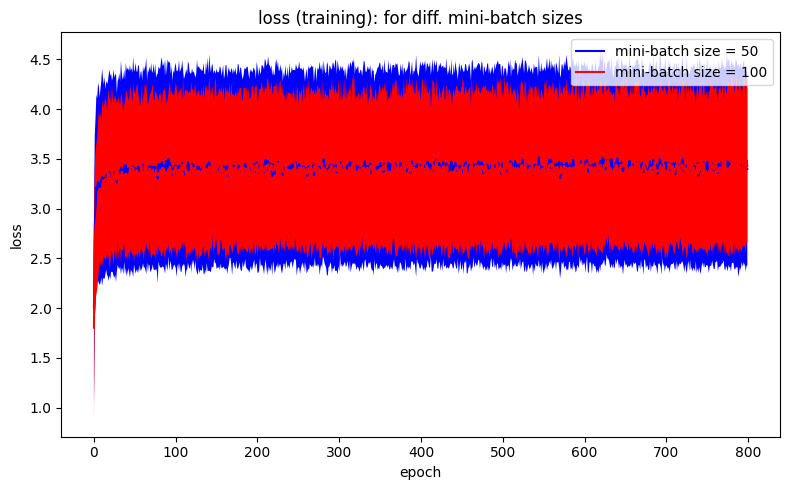

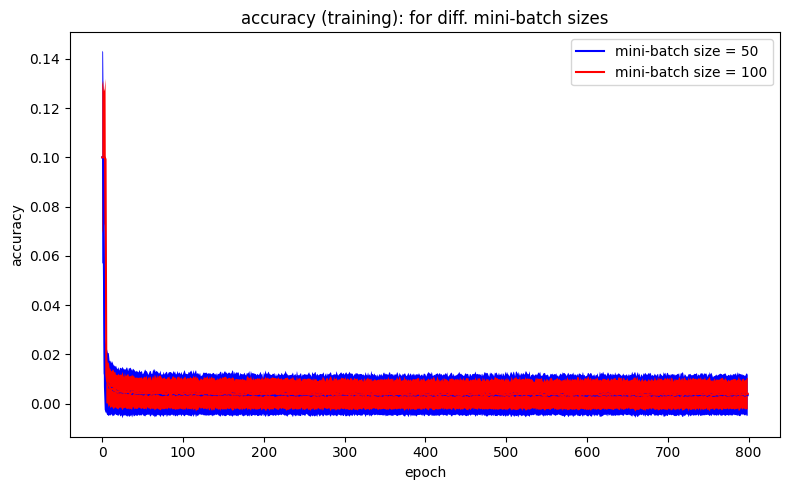

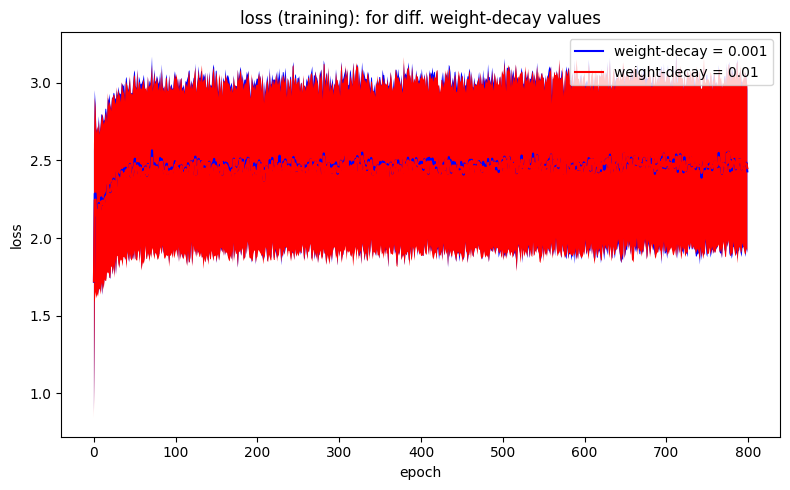

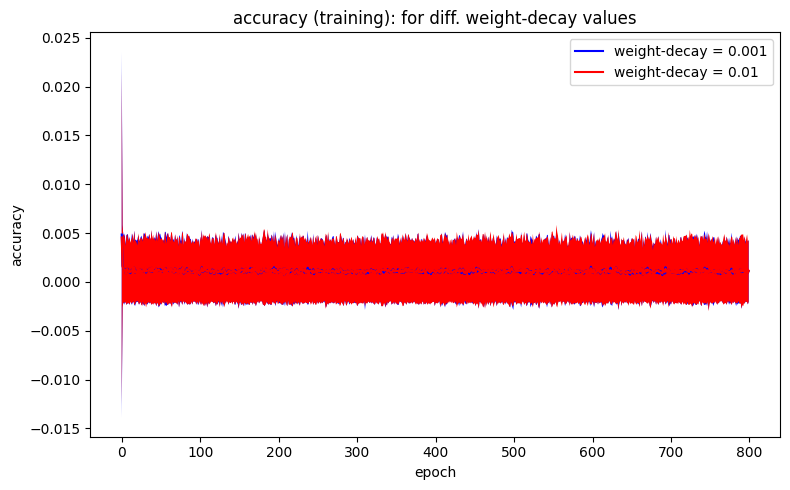

In [38]:
plot_curve_error2(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'mini-batch size = 50',
                  train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'mini-batch size = 100',
                  'epoch', 'loss', 'loss (training): for diff. mini-batch sizes')
plot_curve_error2(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'mini-batch size = 50',
                  train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'mini-batch size = 100',
                  'epoch', 'accuracy', 'accuracy (training): for diff. mini-batch sizes')
plot_curve_error2(train_loss_mean_weight_decay[0], train_loss_std_weight_decay[0], 'weight-decay = 0.001',
                  train_loss_mean_weight_decay[1], train_loss_std_weight_decay[1], 'weight-decay = 0.01',
                  'epoch', 'loss', 'loss (training): for diff. weight-decay values')
plot_curve_error2(train_accuracy_mean_weight_decay[0], train_accuracy_std_weight_decay[0], 'weight-decay = 0.001',
                  train_accuracy_mean_weight_decay[1], train_accuracy_std_weight_decay[1], 'weight-decay = 0.01',
                  'epoch', 'accuracy', 'accuracy (training): for diff. weight-decay values')

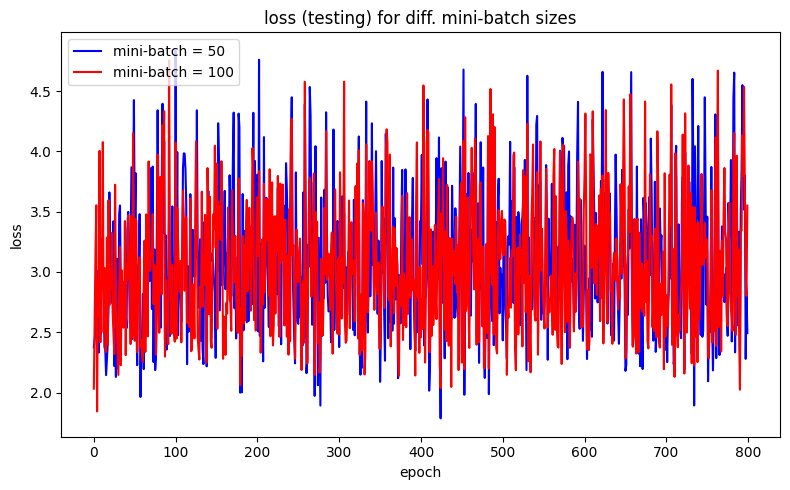

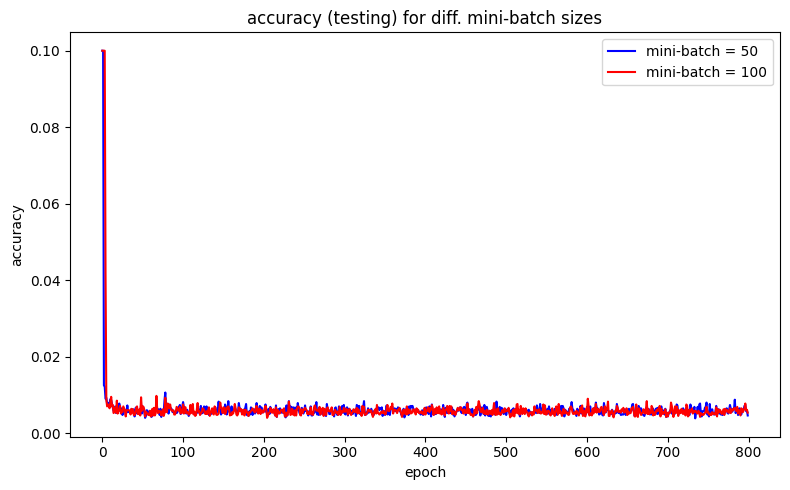

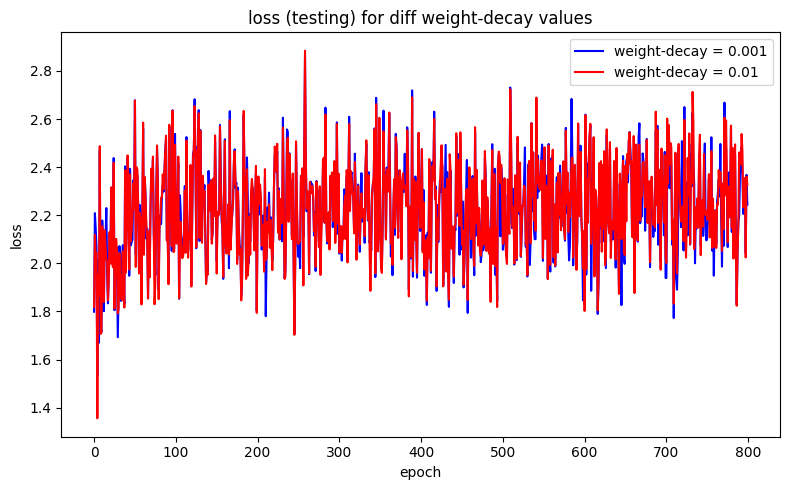

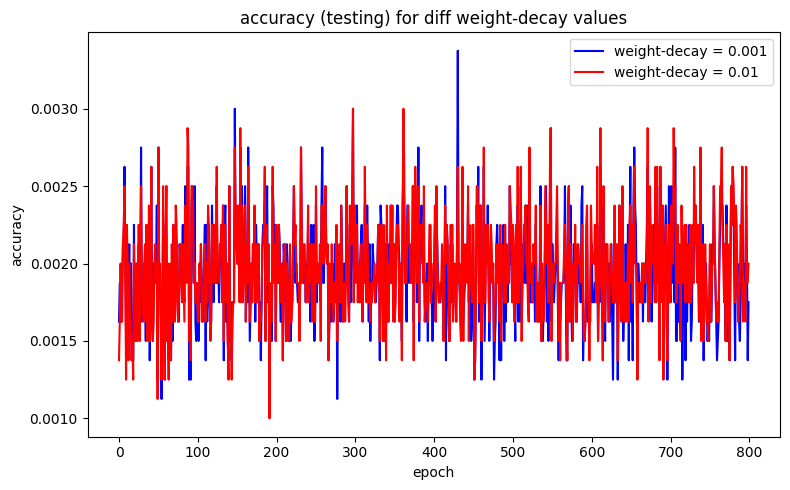

In [34]:
plot_curve2(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', 'epoch', 'loss', 'loss (testing) for diff. mini-batch sizes')
plot_curve2(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', 'epoch', 'accuracy', 'accuracy (testing) for diff. mini-batch sizes')
plot_curve2(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', 'epoch', 'loss', 'loss (testing) for diff weight-decay values')
plot_curve2(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', 'epoch', 'accuracy', 'accuracy (testing) for diff weight-decay values')

## 3] Show mispredictions - <font color='red'>EDIT CODE</font>
### - Visualize 5 random misclassified train images and 5 random misclassified test images.
### - For each, display the image, the predicted distribution, the true and predicted label. Make sure to visualize in a compact and clear manner.

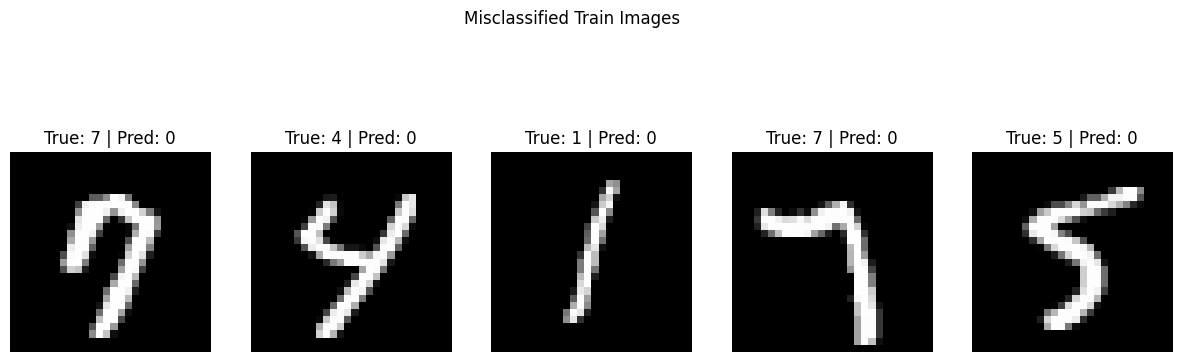

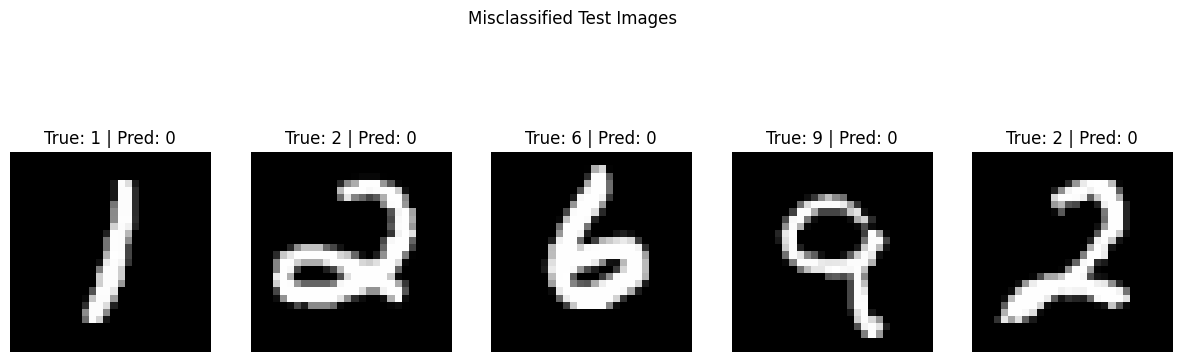

In [42]:
import random

# Function to compute the predicted label
def compute_prediction(data, weight):
    # Your implementation of the prediction function
    pass

# Visualize misclassified train images
train_mispredictions = []
train_mispred_labels = []
train_true_labels = []

for i in range(len(vector_x_train)):
    data = vector_x_train[i]
    label = y_train[i]
    prediction = compute_prediction(data, weight)

    if np.argmax(prediction) != np.argmax(label):
        train_mispredictions.append(data)
        train_mispred_labels.append(np.argmax(prediction))
        train_true_labels.append(np.argmax(label))

# Select 5 random misclassified train images
train_indices = random.sample(range(len(train_mispredictions)), 5)

# Plot the misclassified train images
plt.figure(figsize=(15, 5))
for i, index in enumerate(train_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_mispredictions[index].reshape((28, 28)), cmap='gray')
    plt.title("True: {} | Pred: {}".format(train_true_labels[index], train_mispred_labels[index]))
    plt.axis('off')
plt.suptitle("Misclassified Train Images")
plt.show()

# Visualize misclassified test images
test_mispredictions = []
test_mispred_labels = []
test_true_labels = []

for i in range(len(vector_x_test)):
    data = vector_x_test[i]
    label = y_test[i]
    prediction = compute_prediction(data, weight)

    if np.argmax(prediction) != np.argmax(label):
        test_mispredictions.append(data)
        test_mispred_labels.append(np.argmax(prediction))
        test_true_labels.append(np.argmax(label))

# Select 5 random misclassified test images
test_indices = random.sample(range(len(test_mispredictions)), 5)

# Plot the misclassified test images
plt.figure(figsize=(15, 5))
for i, index in enumerate(test_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_mispredictions[index].reshape((28, 28)), cmap='gray')
    plt.title("True: {} | Pred: {}".format(test_true_labels[index], test_mispred_labels[index]))
    plt.axis('off')
plt.suptitle("Misclassified Test Images")
plt.show()


### 4] Present final results  - <font color='red'>EDIT CODE</font>
### - Display a table with the final results - test accuracies for each of the tested configurations.

In [47]:
import pandas as pd

# Assuming you have the following variables:
# test_accuracy_weight_decay: Test accuracies for each weight decay configuration
# test_accuracy_minibatch: Test accuracies for each mini-batch size configuration
# list_weight_decay: List of weight decay values
# list_minibatch_size: List of mini-batch sizes

# Create a DataFrame to store the results
results_df = pd.DataFrame()

# Add weight decay results to the DataFrame
for i, weight_decay in enumerate(list_weight_decay):
    config_name = "Weight Decay = {}".format(weight_decay)
    results_df[config_name] = test_accuracy_weight_decay[i, :]

# Add mini-batch size results to the DataFrame
for i, minibatch_size in enumerate(list_size_minibatch):
    config_name = "Mini-batch Size = {}".format(minibatch_size)
    results_df[config_name] = test_accuracy_minibatch[i, :]

# Add the mean test accuracies for each configuration
results_df.loc["Mean Accuracy"] = results_df.mean()

# Display the results table
print(results_df)


               Weight Decay = 0.001  Weight Decay = 0.01  \
0                          0.001625             0.001375   
1                          0.001875             0.001625   
2                          0.001875             0.002000   
3                          0.001625             0.001625   
4                          0.001875             0.001625   
...                             ...                  ...   
796                        0.002375             0.002625   
797                        0.002000             0.001875   
798                        0.001375             0.001875   
799                        0.001750             0.002000   
Mean Accuracy              0.001930             0.001965   

               Mini-batch Size = 50  Mini-batch Size = 100  
0                          0.100000               0.100000  
1                          0.100000               0.100000  
2                          0.012500               0.100000  
3                          0.012125

# 5] Improve results - <font color='red'>EDIT CODE</font>
## * Implement two different simple extensions / modifications / configurations that improve the best accuracy achieved above by at least 1%. Do not use a larger number of training epochs.
## * Do not make any special effort to get the best result possible, but simply reach this goal.
### - Insert the required code blocks here below.
### - At the very end (see below), present the final result (test accuracy)

code block 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Define model
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

# Data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

augmented_train_data = data_augmentation.flow(x_train, y_train)

# Learning rate schedule
def learning_rate_schedule(epoch, learning_rate):
    if epoch < 50:
        return learning_rate
    elif epoch < 100:
        return learning_rate * 0.1
    else:
        return learning_rate * 0.01

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Training loop
number_epochs = 150
size_minibatch = 100
num_data_train = x_train.shape[0]
num_minibatch = num_data_train // size_minibatch
train_loss_mean = np.zeros(number_epochs)
train_loss_std = np.zeros(number_epochs)
train_accuracy_mean = np.zeros(number_epochs)
train_accuracy_std = np.zeros(number_epochs)
test_loss = np.zeros(number_epochs)
test_accuracy = np.zeros(number_epochs)

for epoch in tqdm(range(number_epochs)):
    loss_epoch = []
    accuracy_epoch = []

    for batch in augmented_train_data:
        data, label = batch

        # Perform model updates and computations
        loss, accuracy = model.train_on_batch(data, label)
        loss_epoch.append(loss)
        accuracy_epoch.append(accuracy)

        if len(loss_epoch) >= num_minibatch:
            break

    train_loss_mean[epoch] = np.mean(loss_epoch)
    train_loss_std[epoch] = np.std(loss_epoch)
    train_accuracy_mean[epoch] = np.mean(accuracy_epoch)
    train_accuracy_std[epoch] = np.std(accuracy_epoch)

    # Evaluate on test data
    test_loss[epoch], test_accuracy[epoch] = model.evaluate(x_test, y_test, verbose=0)

# Print final test accuracy
final_test_accuracy = test_accuracy[-1]
print("Final Test Accuracy:", final_test_accuracy)


code block 2

code block ...

## Final result - <font color='red'>EDIT TEXT and CODE</font>
### - Edit this text here to explain very shortly what you have done.
### - Use the code block below to present your final results (test accuracy only).